In [4]:
import sys
import pandas as pd
import matplotlib
import seaborn
import sklearn

In [6]:
print(sys.version)
print(pd.__version__)
print(seaborn.__version__)

3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]
0.23.0
0.8.1


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [8]:
#import the data
games=pd.read_csv(r"C:\Users\RAMAN\Desktop\ML Projects\games.csv")

In [9]:
#print the names of the columns in games
print(games.columns)
print(games.shape)


Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


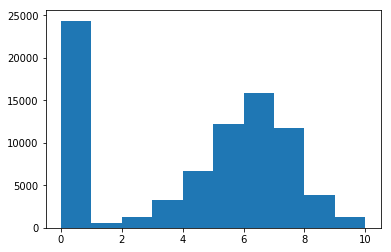

In [10]:
#make histogram of all the ratings in avg rating columns
plt.hist(games["average_rating"])
plt.show()

In [15]:
#print the first row from all games with 0 avg rating
print(games[games["average_rating"]==0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object


In [16]:
#print the first row of games with scores >0
print(games[games["average_rating"]>0].iloc[0])

id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime                           180
minplaytime                           180
maxplaytime                           180
minage                                 13
users_rated                         20113
average_rating                    8.33774
bayes_average_rating              8.22186
total_owners                        26647
total_traders                         372
total_wanters                        1219
total_wishers                        5865
total_comments                       5347
total_weights                        2562
average_weight                     3.4785
Name: 0, dtype: object


In [18]:
#Remove any rows without user review
games=games[games["users_rated"]>0]


In [19]:
#Remove any rows with missing values
games=games.dropna(axis=0)

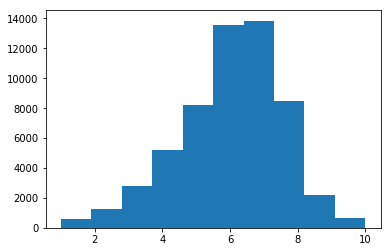

In [23]:
#make histogram of average rating 
plt.hist(games["average_rating"])
plt.show()

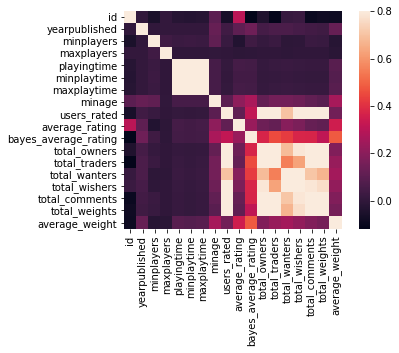

In [29]:
#Correlation matrix
corrmat=games.corr()
sns.heatmap(corrmat,vmax=.8,square=True)
plt.show()

In [42]:
columns=games.columns.tolist()
columns=[c for c in columns if c not in["bayes_average_rating","average_rating","type","name","id"]]
columns

['yearpublished',
 'minplayers',
 'maxplayers',
 'playingtime',
 'minplaytime',
 'maxplaytime',
 'minage',
 'users_rated',
 'total_owners',
 'total_traders',
 'total_wanters',
 'total_wishers',
 'total_comments',
 'total_weights',
 'average_weight']

In [44]:
#target variable
target="average_rating"


In [47]:
#Generate Training and test datasets
#Generate training set
train=games.sample(frac=0.8,random_state=1)
#select anything not in training set and put it in test
test=games.loc[~games.index.isin(train.index)]

In [48]:
#print shapes
print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


In [50]:
#import linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [52]:
#initialize the model  
LR=LinearRegression()
#fit the model
LR.fit(train[columns],train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
#generate predictions for test set
predictions=LR.predict(test[columns])
predictions

array([8.12061283, 9.20860328, 8.61000291, ..., 5.39229134, 5.53885159,
       6.07971124])

In [55]:
#compute error between our test prediction and actual values
mean_squared_error(predictions,test[target])

2.0788190326293257

In [57]:
#Now we'll use non-linear Model
#import the random forest model
from sklearn.ensemble import RandomForestRegressor

In [59]:
#initilaize the model
RFR=RandomForestRegressor(n_estimators=100,min_samples_leaf=10,random_state=1)
#fit to data
RFR.fit(train[columns],train[target])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [60]:
#predictions
predictions2=RFR.predict(test[columns])

In [61]:
#compute the error 
mean_squared_error(predictions2,test[target])

1.4458564605687358

In [66]:
#make prediction with both the models
rating_LR=LR.predict(test[columns].iloc[0].values.reshape(1,-1))
rating_RFR=RFR.predict(test[columns].iloc[0].values.reshape(1,-1))
print(rating_LR)
print(rating_RFR)

[8.12061283]
[7.91373581]
